For this study, I used a dataset created by Joakim Arvidsson (2 years ago, Kaggle.com), coming from a mobile D&D game. All data belongs to them. 

The dataset includes 7,946 characters, each with race, class, and various stats. We focus on single-class characters, which account for 7,475 (94%) of all characters, to ensure a clean comparison of growth potential. I cleaned the dataset in Python (NumPy and Plotly), removed irrelevant columns, and excluded multi-class characters to focus purely on class-specific growth.

Calaeriel, 2026.02.25.
My full analize work: "EfficiencyvsFantasy.pdf", 2026.02.27.

Source: Data: Joakim Arvidsson, updated 2 years ago, downloaded: 2026.02.25. 
https://www.kaggle.com/datasets/joebeachcapital/dungeons-and-dragons-characters > "dnd_chars_unique.tsv"


In [526]:
import pandas as pd
df = pd.read_csv("dnd_chars_unique.tsv", sep="\t")
df = df.drop(columns=["ip", "finger", "name", "alias", "country", "countryCode","good","lawful","date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946 entries, 0 to 7945
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hash                7946 non-null   object
 1   race                7926 non-null   object
 2   background          7931 non-null   object
 3   class               7946 non-null   object
 4   justClass           7946 non-null   object
 5   subclass            6063 non-null   object
 6   level               7946 non-null   int64 
 7   feats               2592 non-null   object
 8   HP                  7946 non-null   int64 
 9   AC                  7946 non-null   int64 
 10  Str                 7946 non-null   int64 
 11  Dex                 7946 non-null   int64 
 12  Con                 7946 non-null   int64 
 13  Int                 7946 non-null   int64 
 14  Wis                 7946 non-null   int64 
 15  Cha                 7946 non-null   int64 
 16  alignment           2074

In [527]:
noline = df[~df["class"].str.contains(r"\|", na=False)].copy()

OneClass = noline[["justClass", "level", "castingStat","HP", "AC", "Str", "Dex", "Con", "Int", "Wis", "Cha"]].copy()

OneClass

,justClass,level,castingStat,HP,AC,Str,Dex,Con,Int,Wis,Cha
0,Ranger,20,Wis,94,16,13,16,13,15,15,14
1,Druid,20,Wis,116,13,14,15,12,11,17,11
2,Fighter,20,Int,290,18,25,19,20,18,15,13
3,Druid,20,Wis,183,15,18,12,18,10,18,9
4,Cleric,20,Wis,183,18,10,14,18,14,20,8
...,...,...,...,...,...,...,...,...,...,...,...
7470,Sorcerer,1,Cha,7,14,11,18,13,16,15,18
7471,Paladin,1,Cha,12,16,14,16,14,9,16,12
7472,Cleric,1,Wis,8,13,14,11,11,15,17,18
7473,Druid,1,Wis,11,12,15,12,16,13,16,13


20


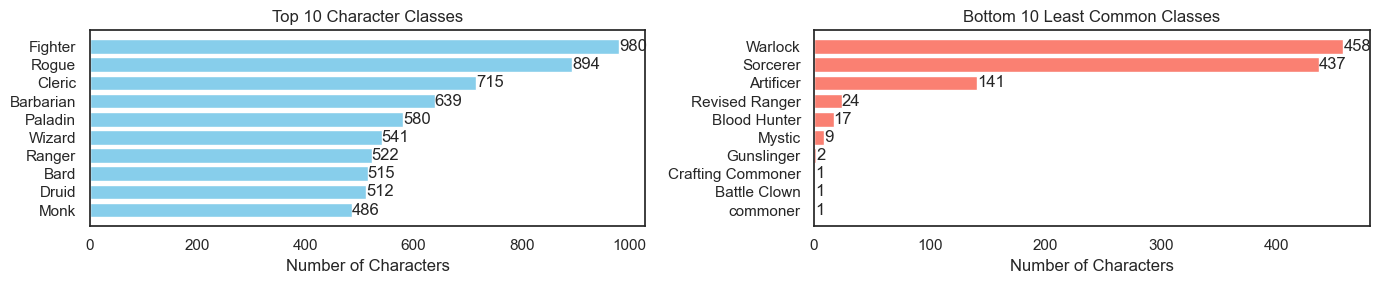

In [ ]:
import matplotlib.pyplot as plt

classes = OneClass["justClass"]
cnumber = classes.value_counts()

top10 = cnumber.head(10)
bottom10 = cnumber.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(14,3))

axes[0].barh(top10.index[::-1], top10.values[::-1], color="skyblue")
for i, v in enumerate(top10.values[::-1]):
    axes[0].text(v, i, str(v), va="center")
axes[0].set_title("Top 10 Character Classes")
axes[0].set_xlabel("Number of Characters")

axes[1].barh(bottom10.index[::-1], bottom10.values[::-1], color="salmon")
for i, v in enumerate(bottom10.values[::-1]):
    axes[1].text(v, i, str(v), va="center")
axes[1].set_title("Bottom 10 Least Common Classes")
axes[1].set_xlabel("Number of Characters")

print(len(OneClass["justClass"].unique()))
plt.tight_layout()
plt.show()

In [529]:
print(df["level"].max())

cols = ["justClass", "level","HP", "AC","Str", "Dex", "Con","Int", "Wis", "Cha"]
stat_cols = ["AC","Str","Dex","Con","Int","Wis","Cha"]
levelone = OneClass.loc[OneClass["level"] == 1, cols].copy()
  
levelmax = OneClass.loc[OneClass["level"] == OneClass["level"].max(), cols].copy()
levelone      

levelone["StatSum"] = levelone[stat_cols].sum(axis=1)
levelmax["StatSum"] = levelmax[stat_cols].sum(axis=1)

levelone_grouped = (levelone.groupby("justClass").agg({"StatSum": "mean","HP": "mean"}).round().reset_index())
levelone_grouped["ClassCount"] = levelone.groupby("justClass")["justClass"].count().values

levelmax_grouped = (levelmax.groupby("justClass").agg({"StatSum": "mean","HP": "mean"}).round().reset_index())
levelmax_grouped["ClassCount"] = levelmax.groupby("justClass")["justClass"].count().values
levelmax_grouped, levelone_grouped

20


(    justClass  StatSum     HP  ClassCount
 0   Barbarian    168.0  389.0          11
 1        Bard     92.0  175.0           3
 2      Cleric    114.0  199.0          18
 3       Druid    100.0  165.0           9
 4     Fighter    112.0  262.0          12
 5        Monk    105.0  162.0          13
 6      Mystic    101.0  163.0           1
 7     Paladin    112.0  235.0          18
 8      Ranger    102.0  109.0           2
 9       Rogue    101.0  158.0           5
 10   Sorcerer    101.0  152.0           5
 11    Warlock    110.0  212.0           9
 12     Wizard    108.0  164.0          15,
          justClass  StatSum    HP  ClassCount
 0        Artificer     94.0  10.0          23
 1        Barbarian     92.0  14.0         166
 2             Bard     90.0   9.0         151
 3     Blood Hunter     90.0  12.0           3
 4           Cleric     94.0  10.0         211
 5            Druid     91.0  10.0         149
 6          Fighter     94.0  13.0         236
 7             Monk  

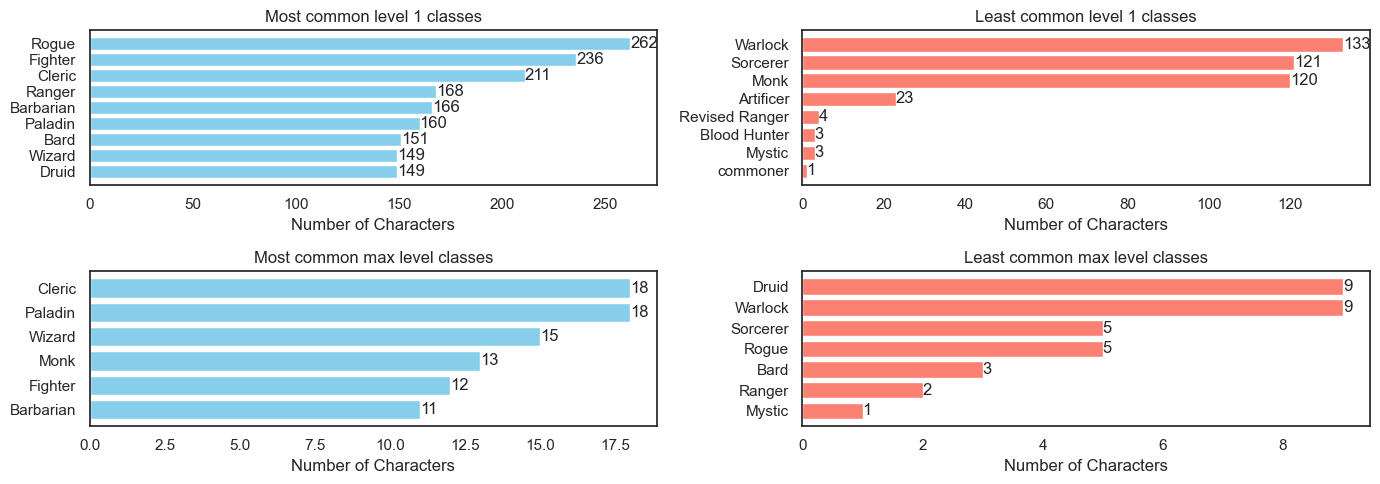

In [530]:
classes2 = levelone["justClass"]
cnumber2 = classes2.value_counts()

toplvl1 = cnumber2.head(9)
bottomlvl1 = cnumber2.tail(8)

fig, axes = plt.subplots(2, 2, figsize=(14,5))

axes[0,0].barh(toplvl1.index[::-1], toplvl1.values[::-1], color="skyblue")
for i, v in enumerate(toplvl1.values[::-1]):
    axes[0,0].text(v, i, str(v), va="center")
axes[0,0].set_title("Most common level 1 classes")
axes[0,0].set_xlabel("Number of Characters")

axes[0,1].barh(bottomlvl1.index[::-1], bottomlvl1.values[::-1], color="salmon")
for i, v in enumerate(bottomlvl1.values[::-1]):
    axes[0,1].text(v, i, str(v), va="center")
axes[0,1].set_title("Least common level 1 classes")
axes[0,1].set_xlabel("Number of Characters")


classesm = levelmax["justClass"]
cnumberm = classesm.value_counts()

toplvlm = cnumberm.head(6)
bottomlvlm = cnumberm.tail(7)

axes[1,0].barh(toplvlm.index[::-1], toplvlm.values[::-1], color="skyblue")
for i, v in enumerate(toplvlm.values[::-1]):
    axes[1,0].text(v, i, str(v), va="center")
axes[1,0].set_title("Most common max level classes")
axes[1,0].set_xlabel("Number of Characters")

axes[1,1].barh(bottomlvlm.index[::-1], bottomlvlm.values[::-1], color="salmon")
for i, v in enumerate(bottomlvlm.values[::-1]):
    axes[1,1].text(v, i, str(v), va="center")
axes[1,1].set_title("Least common max level classes")
axes[1,1].set_xlabel("Number of Characters")

plt.tight_layout()
plt.show()

In [ ]:
sother = ["AC","Str","Dex","Con","Int","Wis","Cha"]
shp = ["HP"]

lvl1so = levelone.groupby("justClass")[sother].mean().round(2)
lvlmaxso = levelmax.groupby("justClass")[sother].mean().round(2)
growthso = lvlmaxso-lvl1so

combined_hp = (levelone_grouped[["justClass", "HP"]].rename(columns={"HP": "lvl1HP"}).merge(levelmax_grouped[["justClass", "HP"]].rename(columns={"HP": "lvlMaxHP"}),on="justClass",how="outer").set_index("justClass"))

combined_hp["growthHP"] = combined_hp["lvlMaxHP"] - combined_hp["lvl1HP"]

combined_hp

,lvl1HP,lvlMaxHP,growthHP
justClass,,,
Artificer,10.0,NaN,NaN
Barbarian,14.0,389.0,375.0
Bard,9.0,175.0,166.0
Blood Hunter,12.0,NaN,NaN
Cleric,10.0,199.0,189.0
Druid,10.0,165.0,155.0
Fighter,13.0,262.0,249.0
Monk,10.0,162.0,152.0
Mystic,8.0,163.0,155.0


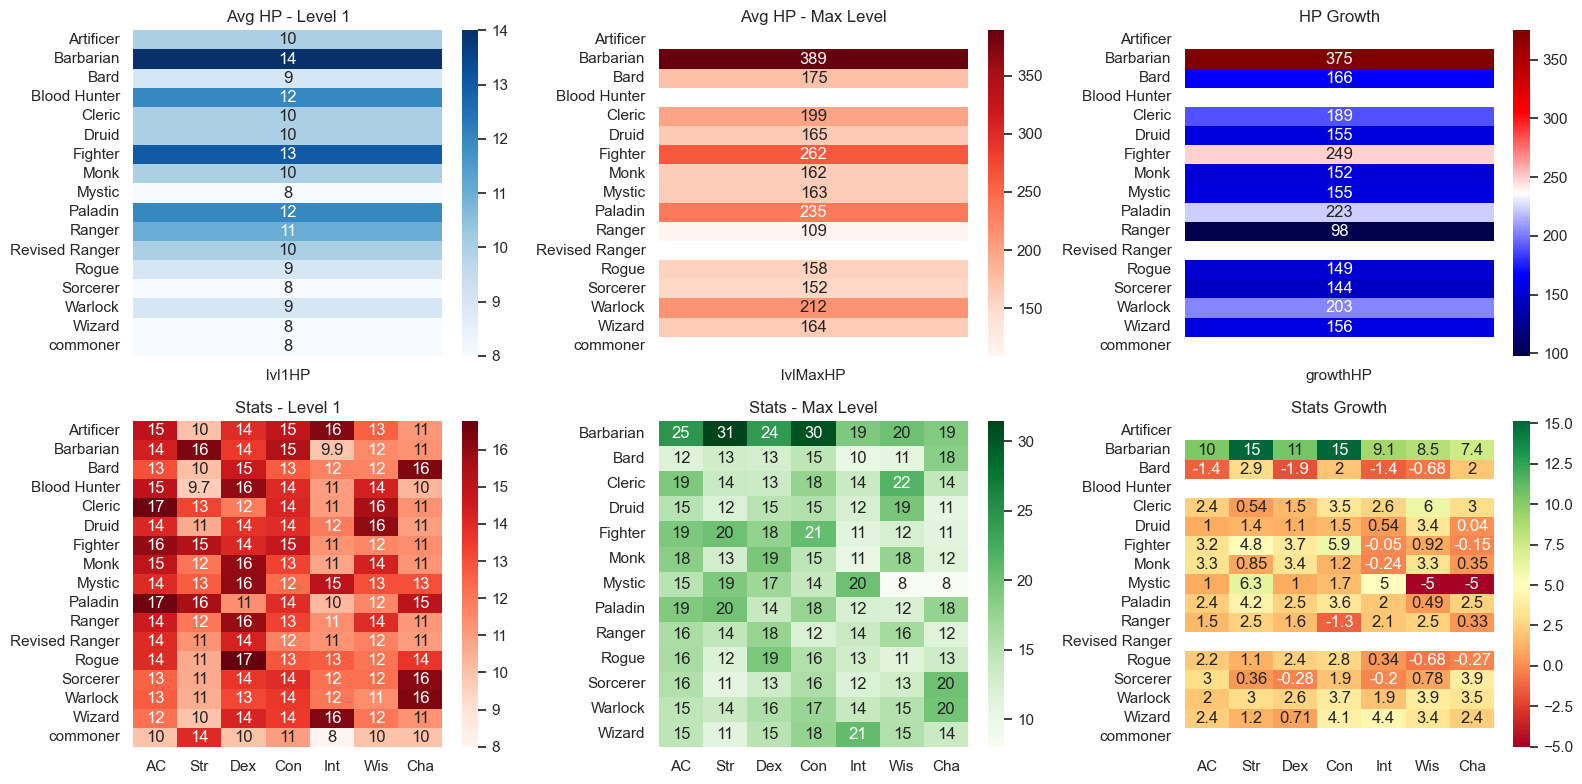

In [541]:
import seaborn as sns

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.heatmap(combined_hp[["lvl1HP"]], annot=True, cmap="Blues")
plt.ylabel("")
plt.title("Avg HP - Level 1")

plt.subplot(2, 3, 2)
sns.heatmap(combined_hp[["lvlMaxHP"]], annot=True, cmap="Reds",fmt=".0f")
plt.ylabel("")
plt.title("Avg HP - Max Level")

plt.subplot(2, 3, 3)
sns.heatmap(combined_hp[["growthHP"]], annot=True, cmap="seismic",fmt=".0f")
plt.ylabel("")
plt.title("HP Growth")

plt.subplot(2, 3, 4)
sns.heatmap(lvl1so, annot=True, cmap="Reds")
plt.ylabel("")
plt.title("Stats - Level 1")

plt.subplot(2, 3, 5)
sns.heatmap(lvlmaxso, annot=True, cmap="Greens")
plt.ylabel("")
plt.title("Stats - Max Level")

plt.subplot(2, 3, 6)
sns.heatmap(growthso, annot=True, cmap="RdYlGn")
plt.ylabel("")
plt.title("Stats Growth")

plt.tight_layout()
plt.show()

In [533]:
lvl1sbas = levelone.groupby("justClass")["StatSum"].mean()
lvlmaxbas = levelmax.groupby("justClass")["StatSum"].mean()

lvl1sbas, lvlmaxbas = lvl1sbas.align(lvlmaxbas, join='inner')
basicstats = pd.DataFrame({"Lvl1Avg": lvl1sbas,"MaxAvg": lvlmaxbas})

lvl1alls = levelone.groupby("justClass")["HP"].mean()
lvlmaxalls = levelmax.groupby("justClass")["HP"].mean()

lvl1alls, lvlmaxalls= lvl1alls.align(lvlmaxalls, join='inner')
allstats = pd.DataFrame({"Lvl1Avg": lvl1alls,"MaxAvg": lvlmaxalls})

basicstats, allstats


(             Lvl1Avg      MaxAvg
 justClass                       
 Barbarian  92.361446  168.454545
 Bard       90.039735   91.666667
 Cleric     93.909953  113.500000
 Druid      91.328859  100.333333
 Fighter    94.224576  112.500000
 Monk       92.558333  104.769231
 Mystic     96.000000  101.000000
 Paladin    94.325000  112.055556
 Ranger     92.291667  101.500000
 Rogue      92.675573  100.600000
 Sorcerer   91.388430  100.800000
 Warlock    89.781955  110.333333
 Wizard     89.496644  108.133333,
              Lvl1Avg      MaxAvg
 justClass                       
 Barbarian  14.018072  388.545455
 Bard        8.887417  175.333333
 Cleric      9.886256  198.833333
 Druid       9.919463  165.000000
 Fighter    12.618644  262.416667
 Monk        9.641667  162.461538
 Mystic      8.000000  163.000000
 Paladin    11.781250  235.277778
 Ranger     11.184524  109.000000
 Rogue       9.171756  158.400000
 Sorcerer    7.743802  151.800000
 Warlock     9.308271  211.666667
 Wizard      

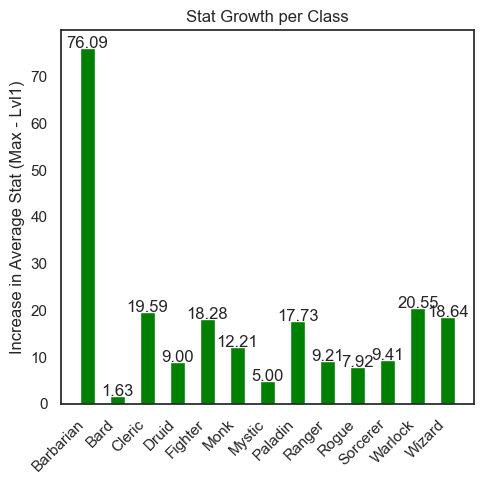

In [ ]:
import numpy as np

diff = basicstats["MaxAvg"] - basicstats["Lvl1Avg"]

x = np.arange(len(diff))
bar_width = 0.5

fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, diff, width=bar_width, color="green")

ax.set_xticks(x)
ax.set_xticklabels(diff.index, rotation=45, ha="right")
ax.set_ylabel("Increase in Average Stat (Max - Lvl1)")
ax.set_title("Stat Growth per Class")

for i in range(len(x)):
    ax.text(x[i], diff.iloc[i], f"{diff.iloc[i]:.2f}", ha="center")

plt.tight_layout()
plt.show()

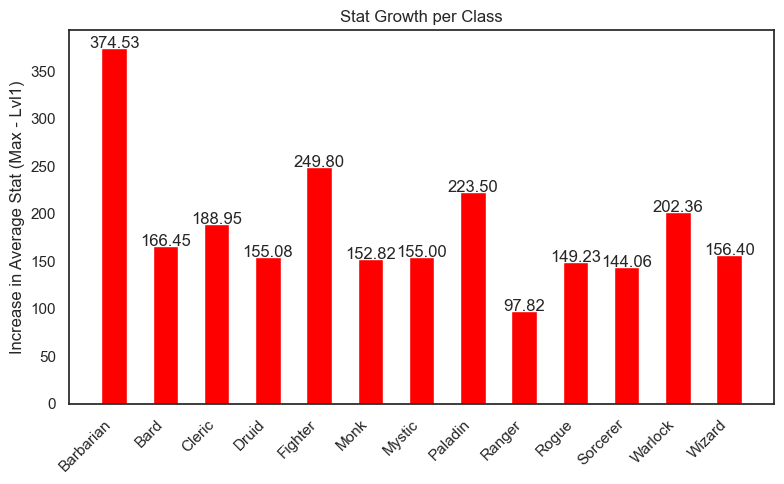

In [587]:
import numpy as np

diff = allstats["MaxAvg"] - allstats["Lvl1Avg"]

x = np.arange(len(diff))
bar_width = 0.5

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x, diff, width=bar_width, color="red")

ax.set_xticks(x)
ax.set_xticklabels(diff.index, rotation=45, ha="right")
ax.set_ylabel("Increase in Average Stat (Max - Lvl1)")
ax.set_title("Stat Growth per Class")

for i in range(len(x)):
    ax.text(x[i], diff.iloc[i], f"{diff.iloc[i]:.2f}", ha="center")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

combined_hp["growthHP"]
basicstats_growth=basicstats["MaxAvg"]-basicstats["Lvl1Avg"]

hp_growth = (allstats["MaxAvg"] - allstats["Lvl1Avg"])   
stat_growth = basicstats["MaxAvg"] - basicstats["Lvl1Avg"]

cool = pd.DataFrame({"growthHP": hp_growth,"Statgrowth": stat_growth})


hp_scaled = (cool["growthHP"] - cool["growthHP"].min()) / (cool["growthHP"].max() - cool["growthHP"].min())
stat_scaled = (cool["Statgrowth"] - cool["Statgrowth"].min()) / (cool["Statgrowth"].max() - cool["Statgrowth"].min())

df_power = pd.DataFrame({"PowerIndex": (hp_scaled + stat_scaled) / 2})

df_power

,PowerIndex
justClass,
Barbarian,1.000000
Bard,0.124011
Cleric,0.285281
Druid,0.153010
Fighter,0.386408
Monk,0.170455
Mystic,0.125977
Paladin,0.335224
Ranger,0.050905


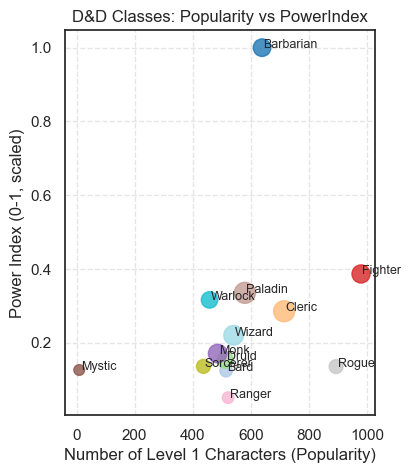

In [ ]:
popularity = OneClass.groupby("justClass").size().reset_index(name="Popularity")

lvl20_counts = OneClass[OneClass["level"] == OneClass["level"].max()]
lvl20_counts = lvl20_counts.groupby("justClass").size().reset_index(name="Lvl20_Count")

df_plot = df_power.merge(popularity, on="justClass").merge(lvl20_counts, on="justClass", how="left")
df_plot["Lvl20_Count"] = df_plot["Lvl20_Count"].fillna(0)

plt.figure(figsize=(4,5))
scatter = plt.scatter(df_plot["Popularity"],df_plot["PowerIndex"],s=df_plot["Lvl20_Count"]*10 + 50,c=range(len(df_plot)),cmap="tab20",alpha=0.8)

for i, row in df_plot.iterrows():
    plt.text(row["Popularity"]+5, row["PowerIndex"], row["class_name"], fontsize=9)

plt.title("D&D Classes: Popularity vs PowerIndex")
plt.xlabel("Number of Level 1 Characters (Popularity)")
plt.ylabel("Power Index (0-1, scaled)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()